**일자리 관련 현안을 파악하기 위한 데이터들을 아카이핑하는 노트북 파일**

In [ ]:
# 초기 실행시 이 셀만 실행한 뒤, '런타임 다시 실행' 해주세요. 한글 글꼴 설치 코드입니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,391 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import matplotlib.pyplot as plt
import warnings

%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
workingdirectory = '/content/drive/MyDrive/광진구공모전/'
os.chdir(workingdirectory)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
print(os.getcwd())

/content/drive/.shortcut-targets-by-id/1SSRPhmMJa8gJ7616TGUdIRukAu0aBzUf/광진구공모전


# 1. 서울일자리센터 인재정보 직종별, 지역별 목록
link: https://data.seoul.go.kr/dataList/OA-21055/S/1/datasetView.do  
공개일자	2021.06.15.   
최신수정일자	2023.04.05. ==> 04.29 csv파일 새로 받고 API 코드도 추가했습니다.   
갱신주기	매일1회  

In [ ]:
h_resource = pd.read_csv('./data/raw/서울일자리센터 인재정보 직종별, 지역별 목록.csv', encoding = 'cp949')

In [ ]:
h_resource.head(2)

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,희망직종공통코드명,희망직종경력년수,희망직종경력개월수,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H130202304282031,여,71,J00106,고등학교,서울,금천구,NaN,NaN,561101,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",2.0,0.0,2년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,2023-04-28 18:16:43.0,2023-04-28 18:16:48.0
1,H110202304282014,여,74,J00110,대학_대학교,서울,서초구,서울,강남구,532302,단체 급식 보조원,9.0,0.0,9년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,2023-04-28 18:12:00.0,2023-04-28 18:12:06.0


In [ ]:
h_resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   구직신청번호          1004 non-null   object 
 1   성별              1004 non-null   object 
 2   나이              1004 non-null   int64  
 3   학력공통코드          1004 non-null   object 
 4   학력공통코드명         1004 non-null   object 
 5   희망근무지역(시도)_1    978 non-null    object 
 6   희망근무지역명(시군구)_1  859 non-null    object 
 7   희망근무지역명(시도)_2   772 non-null    object 
 8   희망근무지역명(시군구)_2  347 non-null    object 
 9   희망직종공통코드        1004 non-null   int64  
 10  희망직종공통코드명       1004 non-null   object 
 11  희망직종경력년수        577 non-null    float64
 12  희망직종경력개월수       577 non-null    float64
 13  희망직종경력년_월수      1004 non-null   object 
 14  구직인증상태공통구분      1004 non-null   object 
 15  구직인증상태공통구분명     1004 non-null   object 
 16  검색키워드1          178 non-null    object 
 17  검색키워드2          137 non-null    o

In [ ]:
h_resource.describe()

,나이,희망직종공통코드,희망직종경력년수,희망직종경력개월수
count,1004.000000,1004.000000,577.000000,577.000000
mean,59.771912,471807.402390,6.389948,1.207972
std,12.570787,204482.174976,7.766477,2.530729
min,20.000000,12200.000000,0.000000,0.000000
25%,56.000000,531576.250000,1.000000,0.000000
50%,63.000000,550104.000000,4.000000,0.000000
75%,68.000000,561101.000000,9.000000,0.000000
max,85.000000,905002.000000,50.000000,11.000000


In [ ]:
gwangjin_hr = h_resource[h_resource['희망근무지역명(시군구)_1']=='광진구']
gwangjin_hr.describe()

,나이,희망직종공통코드,희망직종경력년수,희망직종경력개월수
count,22.000000,22.000000,9.000000,9.000000
mean,60.363636,563797.454545,5.888889,1.444444
std,9.935724,38538.862996,5.085382,2.403701
min,29.000000,541901.000000,0.000000,0.000000
25%,55.500000,542002.000000,2.000000,0.000000
50%,63.000000,550104.000000,4.000000,0.000000
75%,67.500000,561101.000000,10.000000,2.000000
max,72.000000,702901.000000,14.000000,6.000000


In [ ]:
gwangjin_hr.shape

(22, 23)

## api로 해보기

In [ ]:
# 4월 29일 현시각 기준 데이터는 1004개 있습니다. 날마다 바뀌니 2000까지는 받는 코드로 작성하겠습니다.
key = '7078587044796a68313234634d544c57'
results = []
for i in range(1,3):
  
  endindex = 1000*i
  startindex = endindex-999
  url = f'http://openapi.seoul.go.kr:8088/{key}/json/TnJbhntBassOpen/{startindex}/{endindex}/'
  response = requests.get(url)
  result = response.json()
  results.append(result['TnJbhntBassOpen']['row'])

KeyError: ignored

In [ ]:
final_result = pd.concat([pd.DataFrame(results[0]), pd.DataFrame(results[1])])

In [ ]:
final_result.columns = gwangjin_hr.columns

In [ ]:
print(final_result.shape)

(1004, 23)


In [ ]:
final_result = h_resource

In [ ]:
cleaner = ['청소원', '미화원','수거원','세정원','방역원', '세탁원'] # result1
reader = ['검침', '점검', '단순'] #result2
secure = ['경비원','관리원', '감시원','관리소','경비'] #result3
care = ['육아','생활지도','간병인','보호사','가사','안내원'] #result4
driver = ['화물차','택시','특수차','택배원','운반원', '운전원', '배달원'] #result5


# 단순노무 종사원 5종(result1~result5) 데이터프레임 합친것

result = pd.DataFrame()

for word_list in [cleaner, reader, secure, care, driver]:

  # join함수를 이용하여 이어주고 contains 함수에 넣기
    mask = final_result['희망직종공통코드명'].str.contains('|'.join(word_list), na=False)

    word_result = final_result[mask]

  # 각 5종 result 값 모두 result 하나로 합쳐주기
    result = pd.concat([result, word_result])


result

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,희망직종공통코드명,희망직종경력년수,희망직종경력개월수,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H130202304282031,여,71,J00106,고등학교,서울,금천구,NaN,NaN,561101,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",2.0,0.0,2년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,2023-04-28 18:16:43.0,2023-04-28 18:16:48.0
8,H322202304281990,여,63,J00106,고등학교,서울,서초구,서울,강남구,561101,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",NaN,NaN,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-28 17:57:41.0,2023-04-28 17:57:47.0
21,H108202304281878,여,72,J00102,초등학교,서울,서대문구,서울,마포구,561101,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",NaN,NaN,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,2023-04-28 17:23:37.0,2023-04-28 17:23:42.0
36,H323202304281767,여,72,J00102,초등학교,서울,강남구,서울,송파구,561100,청소원,30.0,0.0,30년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-28 16:43:25.0,2023-04-28 16:43:25.0
43,H308202304281742,여,59,J00100,관계없음,서울,성북구,서울,NaN,561101,"건물 청소원(공공건물,아파트,사무실,병원,상가,공장 등)",6.0,0.0,6년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-28 16:37:36.0,2023-04-28 16:37:40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,H128202304262075,남,63,J00110,대학_대학교,서울,강북구,서울,NaN,622202,관광 및 통근?통학?학원 및 기타 버스 운전원,30.0,0.0,30년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-26 16:50:56.0,2023-04-26 16:50:59.0
722,H320202304261832,남,53,J00106,고등학교,서울,동작구,서울,NaN,624103,배송?납품 운전원(납품영업 포함),NaN,NaN,신입,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-26 15:53:36.0,2023-04-26 15:53:41.0
777,H304202304261445,남,35,J00110,대학_대학교,서울,강북구,서울,NaN,624103,배송?납품 운전원(납품영업 포함),4.0,0.0,4년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-26 14:26:58.0,2023-04-26 14:27:01.0
815,H317202304261116,남,65,J00108,전문대학,서울,구로구,서울,양천구,624103,배송?납품 운전원(납품영업 포함),7.0,0.0,7년0월,J03404,알선,NaN,NaN,NaN,NaN,NaN,2023-04-26 13:07:42.0,2023-04-26 13:07:46.0


In [ ]:
# 단순노무 5종에 해당하지 않는 사람들만 모은 노중복 데이터프레임

merged_df = pd.merge(final_result, result, on='구직신청번호', how='outer', indicator=True)
nojungbok_simple = merged_df.loc[merged_df['_merge'] == 'left_only']
nojungbok_simple.dropna(inplace=True, axis=1)
nojungbok_simple.drop(columns = ['_merge'],inplace=True, axis=1)
nojungbok_simple.shape

(341, 12)

In [ ]:
# 단순노무5종 데이터프레임의 '직종'열에 통합된 직종명을 대체로 넣어주기
result_2=pd.DataFrame()
for word, job in [('청소원',cleaner), ('점검원', reader) , ('경비원',secure) , ('간병인,도우미',care), ('운전원',driver)]:

  # 해당하는 단어로 바꿔서 넣어주기
  mask = final_result['희망직종공통코드명'].str.contains('|'.join(job), na=False)
  word_result = final_result[mask]
  word_result['직종'] = word

  result_2 = pd.concat([result_2, word_result])

print('단순노무: ',result_2.shape)

# 노중복 데이터프레임에는 '기존 직종명' 그대로 넣어주기

nojungbok_simple['직종'] = nojungbok_simple['희망직종공통코드명_x']
print('기타 직종: ', nojungbok_simple.shape)

nojungbok_simple.columns = result_2.columns
nojungbok_simple.columns

단순노무:  (664, 24)
기타 직종:  (341, 13)


ValueError: ignored

In [ ]:
# 두 개의 데이터프레임을 최종본으로 합쳐주기
# 이제 모든 데이터는 result_end에서 뽑으면 된다.

result_end = pd.concat([result_2, nojungbok_simple], axis=0)
result_end.shape

(1005, 24)

In [ ]:
result_end['직종'].value_counts()

간병인,도우미                       230
청소원                           211
경비원                           161
운전원                            31
점검원                            31
                             ... 
금융 컨설턴트, PB 등 기타 금융·보험 전문가      1
사회복지사(공공행정)                     1
안내·접수원 및 전화교환원                  1
경영 컨설턴트(M&A·창업·인증심사·FTA)        1
부동산·임대업 관리자                     1
Name: 직종, Length: 148, dtype: int64

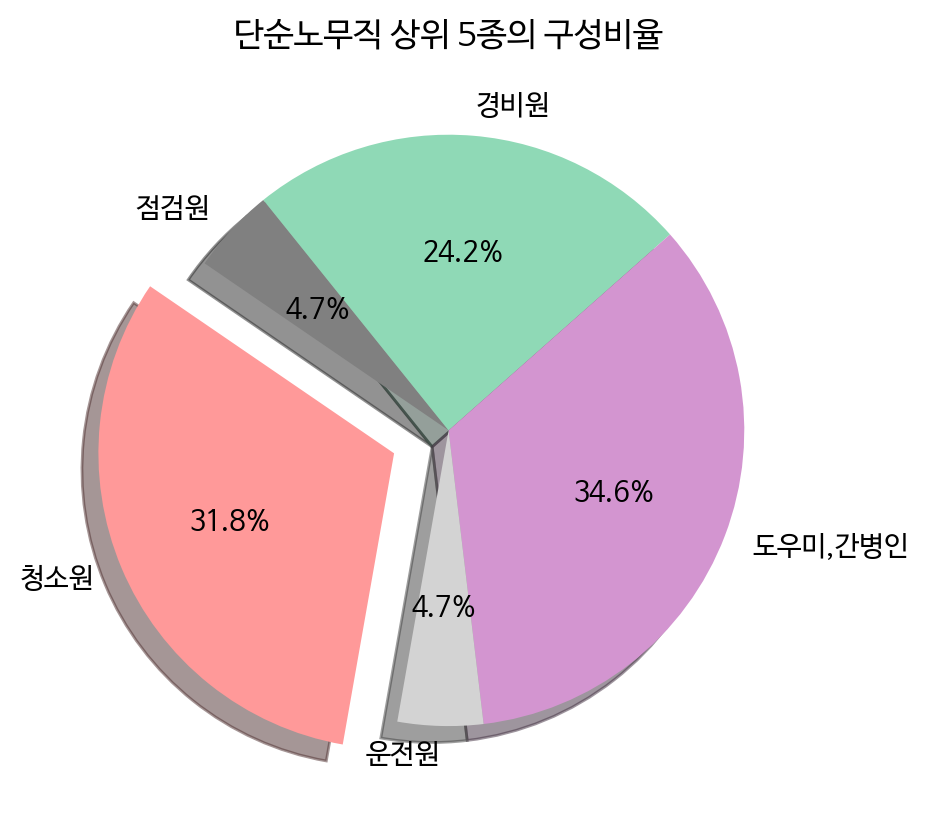

In [ ]:

simple = {'단순노무직': ['청소원','점검원','경비원','도우미,간병인','운전원'],
          '구직인원' : [211, 31, 161, 230, 31]}

# DataFrame
df = pd.DataFrame(simple)

# 시각화
ratio = [211, 31, 161, 230, 31]
labels = ['청소원','점검원','경비원','도우미,간병인','운전원']
explode = [0.2, 0 , 0, 0, 0]
colors = ['#ff9999', 'gray', '#8fd9b6', '#d395d0', 'lightgray']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode,  shadow=True,colors=colors)
plt.title('단순노무직 상위 5종의 구성비율')
plt.show()

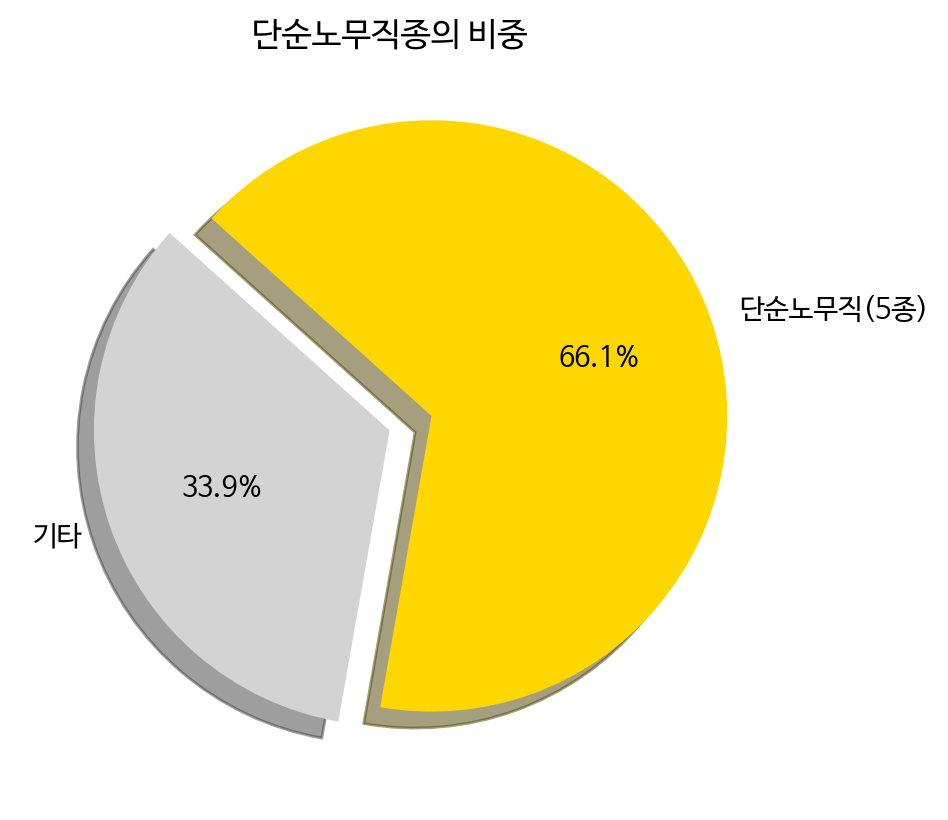

In [ ]:
# 전체 행에서 단순노무 5종 비중만 차이로 표시 (664, 1004)
# 단순 5종 외의 다른 직종에도 놓친 단순노무직종들이 있을 것으로 예상됨 -> 구직자들의 단순노무직종의 비율이 높음

ratio = [340, 664]
labels = ['기타','단순노무직(5종)']
explode = [0, 0.15]
colors = ['lightgray','gold']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('단순노무직종의 비중')
plt.show()

In [ ]:
# 일자리 희망직종 순위 상위권만 나열 

result_end['직종'].value_counts()

df_val = pd.DataFrame(result_end['직종'].value_counts())
df_val = df_val.head(9)

<Figure size 1500x1500 with 0 Axes>

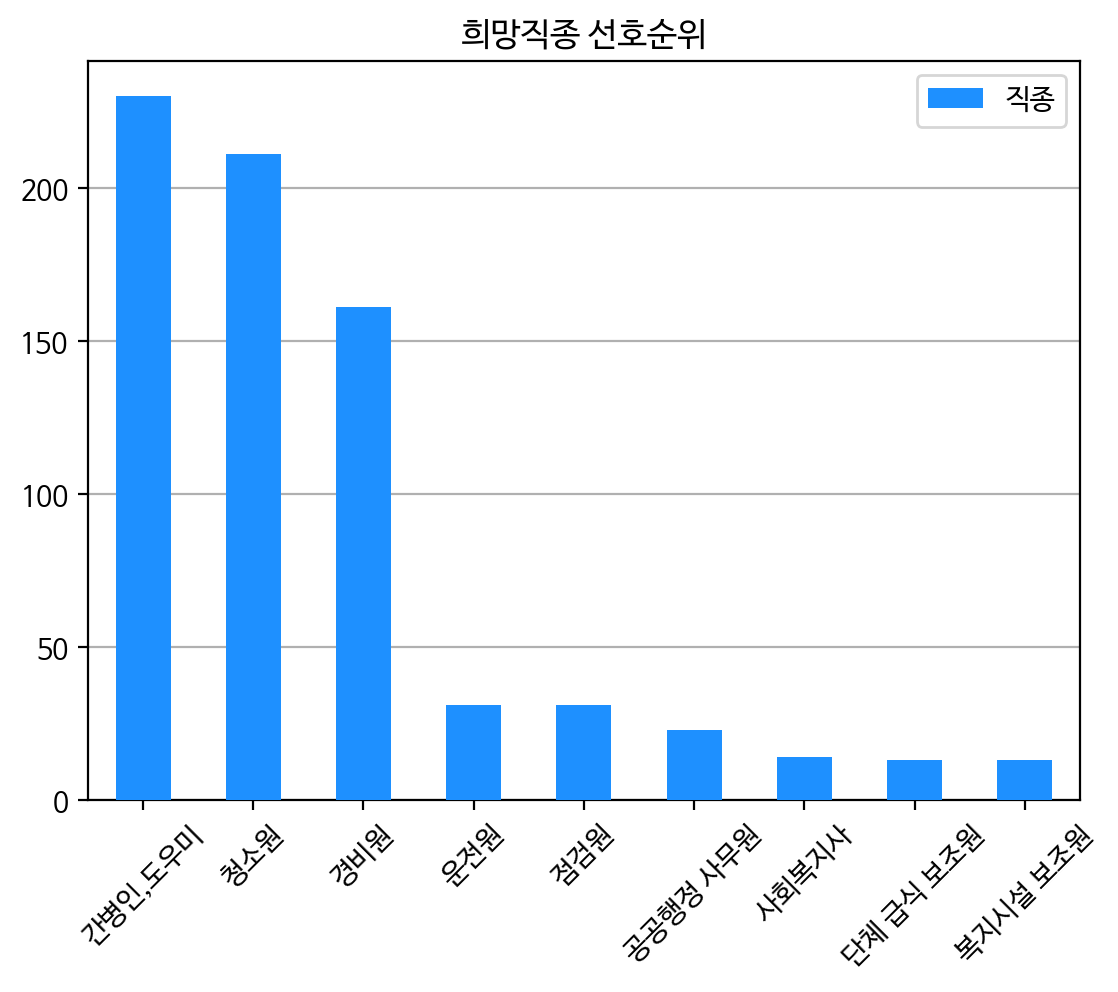

In [ ]:
plt.figure(figsize=(15,15))
df_val.plot(kind='bar', zorder=3, color='#1E90FF')
plt.xticks(rotation=45)
plt.grid(axis='y', zorder=0)
plt.title('희망직종 선호순위')

plt.show()

In [ ]:
# 구직자 연령, 희망직종, 성별 등등 현황 분석
import seaborn as sns
import numpy as np

result_end2 = result_end[['성별','나이','직종','희망직종경력년_월수']]

# 홈페이지에서 구직자의 연령대와 성별(hue), 구해보니 10대와 80대 이상부턴 인원이 급격하게 적어서 좀더 깔끔하게 (20대 이하, 70대 이상)으로 퉁쳤음
label01 = ['20대이하', '30대','40대','50대','60대','70대이상']
bin01 = [-np.inf, 30, 40, 50, 60, 70, np.inf ]

result_end2['연령대'] = pd.cut(result_end2['나이'], bins=bin01, labels=label01, right=False)


result_end2['연령대'].value_counts()

60대      469
70대이상    192
50대      187
20대이하     57
40대       57
30대       43
Name: 연령대, dtype: int64

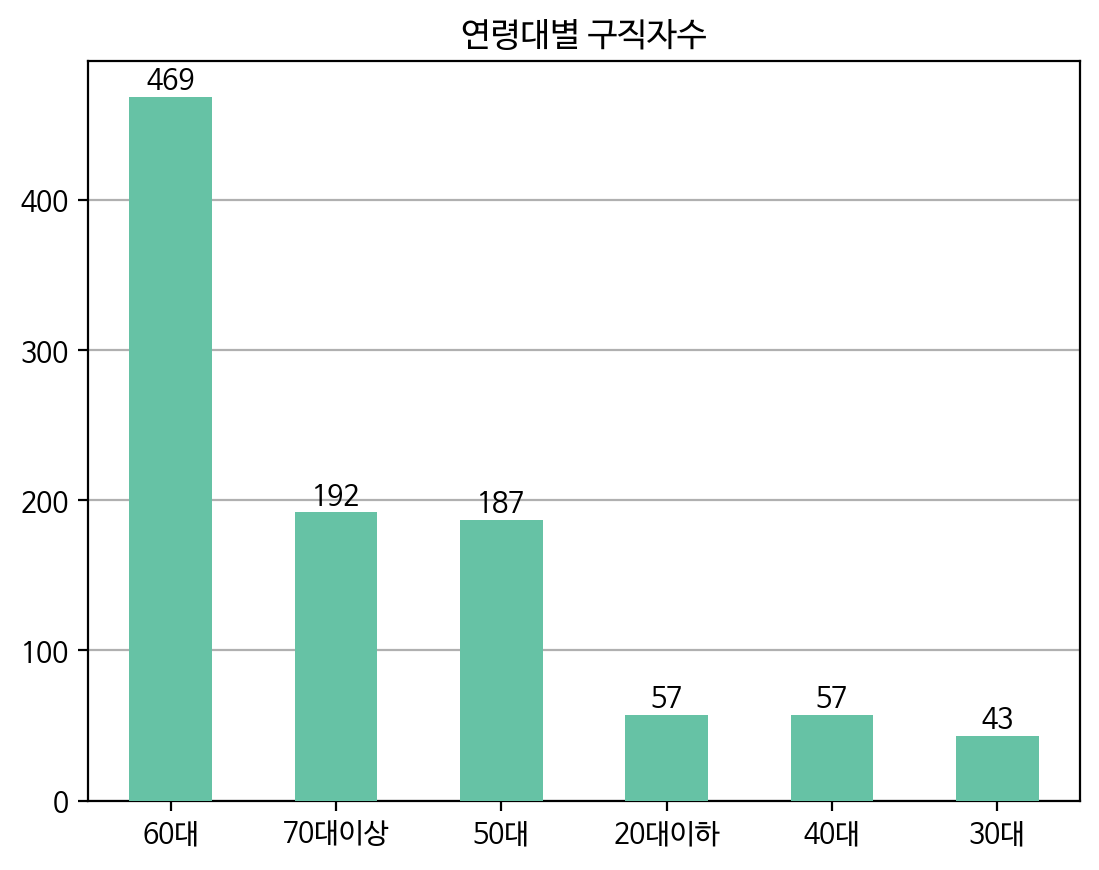

In [ ]:
# 연령대별 구직자수 구하기
value_counts = result_end2['연령대'].value_counts()

# 그래프 그리기
ax = value_counts.plot(kind='bar', zorder=3, colormap='Set2')

# annotation 추가
for i, v in enumerate(value_counts):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.grid(zorder=0, axis='y')
plt.title('연령대별 구직자수')
plt.show()

In [ ]:
result_end3 = result_end2.loc[(result_end2['연령대']=='70대이상'), ['성별','연령대','직종']]
result_end4 = result_end2.loc[(result_end2['연령대']=='60대'), ['성별','연령대','직종']]
result_end5 = result_end2.loc[(result_end2['연령대']=='50대'), ['성별','연령대','직종']]

result_end5.shape

(187, 3)

In [ ]:
job50.columns

Index(['직종', '성별', 0, '연령대'], dtype='object')

In [ ]:
# 50대
job50 = pd.DataFrame(result_end5[['직종','성별']].value_counts())
job50['연령대'] = '50대'
job50.reset_index(inplace=True, drop=False)
job50.columns = ['직종','성별','count','연령대']
job50 = job50.loc[job50['count']>=3]
job50.sort_values(by=['직종','count'], inplace=True, ascending=[True,False])
job50


,직종,성별,count,연령대
0,"간병인,도우미",여,46,50대
14,"간병인,도우미",남,3,50대
5,간호조무사,여,6,50대
2,경비원,남,14,50대
15,그 외 사회복지 종사원,여,3,50대
13,기타 사회복지 종사원,여,3,50대
11,백화점 판매원,여,3,50대
7,복지시설 보조원,여,5,50대
10,사무 보조원(공공기관),여,3,50대
6,사회복지사,여,6,50대


In [ ]:
job60

,직종,성별,count,연령대
0,"간병인,도우미",여,132,60대
5,"간병인,도우미",남,12,60대
6,건물 보수원 및 영선원(아파트 기계·전기 시설관리 제외),남,9,60대
2,경비원,남,81,60대
7,복지시설 보조원,여,8,60대
4,운전원,남,14,60대
8,점검원,남,8,60대
1,청소원,여,83,60대
3,청소원,남,25,60대


In [ ]:
# 50대
job50 = pd.DataFrame(result_end5[['직종','성별']].value_counts())
job50['연령대'] = '50대'
job50.reset_index(inplace=True, drop=False)
job50.columns = ['직종','성별','count','연령대']
job50 = job50.loc[job50['count']>=8]
job50.sort_values(by=['직종','count'], inplace=True, ascending=[True,False])
job50


#60대
job60 = pd.DataFrame(result_end4[['직종','성별']].value_counts())
job60['연령대'] = '60대'
job60.reset_index(inplace=True, drop=False)
job60.columns = ['직종','성별','count','연령대']
job60 = job60.loc[job60['count']>=8]
job60.sort_values(by=['직종','count'], inplace=True, ascending=[True,False])
job60

#70대
job70 = pd.DataFrame(result_end3[['직종','성별']].value_counts())
job70['연령대'] = '70대'
job70.reset_index(inplace=True, drop=False)
job70.columns = ['직종','성별','count','연령대']
job70 = job70.loc[job70['count']>=8]
job70.sort_values(by=['직종','count'], inplace=True, ascending=[True,False])
job70

job50_70 = pd.concat([job50, job60, job70], axis=0)
job50_70.shape

(18, 4)

In [ ]:
job50_70.head()

,직종,성별,count,연령대
0,"간병인,도우미",여,46,50대
2,경비원,남,14,50대
4,운전원,남,8,50대
3,점검원,여,9,50대
1,청소원,여,28,50대


<Figure size 10000x1000 with 0 Axes>

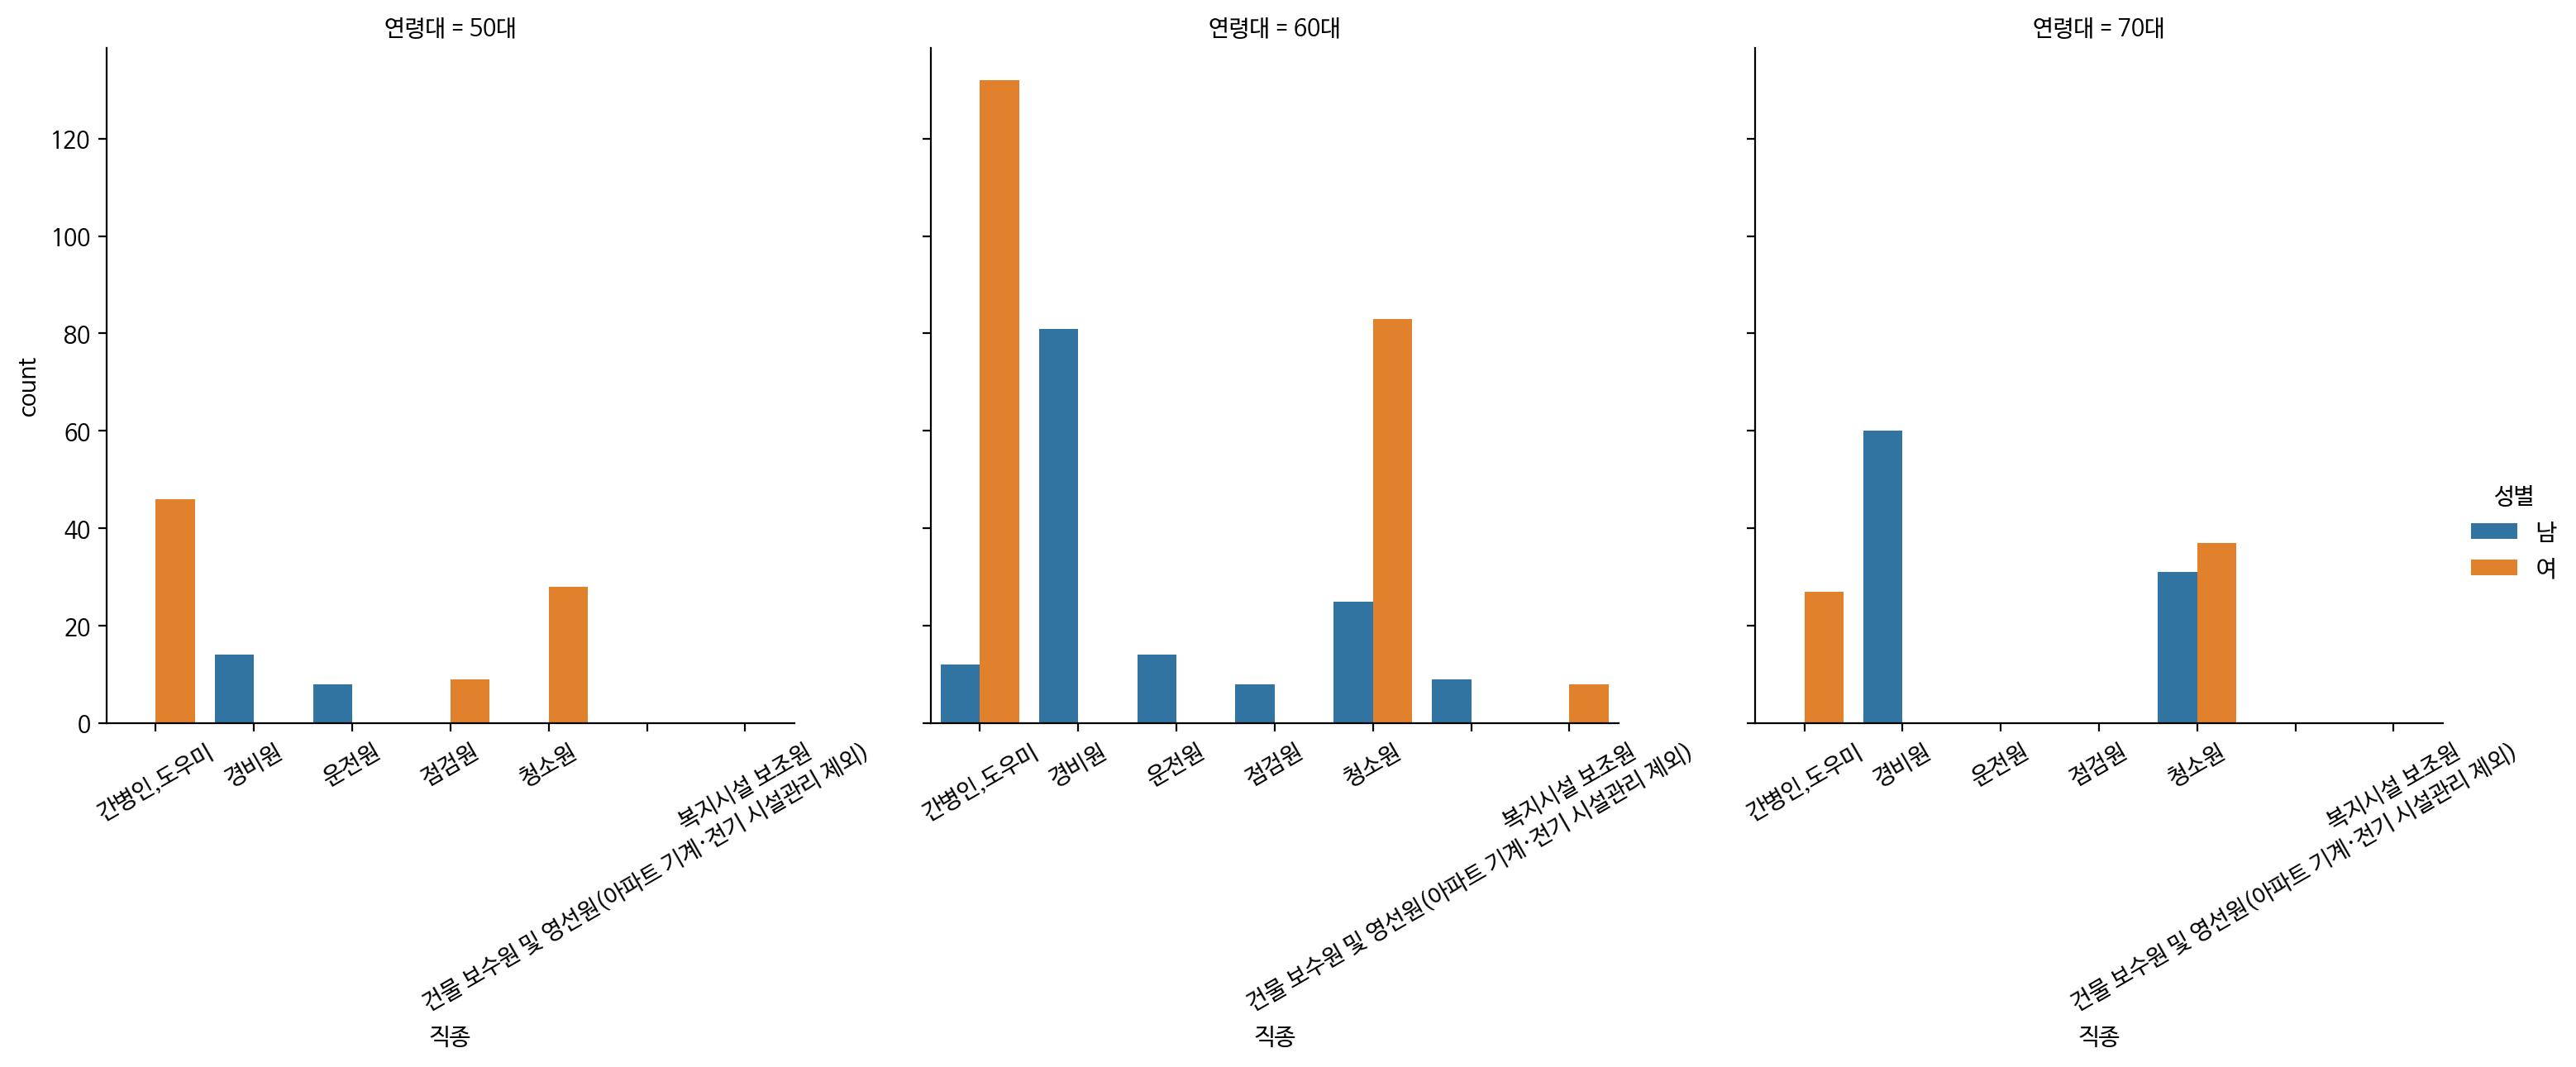

In [ ]:
plt.figure(figsize=(100, 10))
g = sns.catplot(data=job50_70, x='직종', y='count', hue='성별',hue_order=['남','여'], col='연령대',kind='bar')
g.set_xticklabels(rotation=30)
plt.show()

In [ ]:
# 더 추가했으면 좋겠는 데이터?

# 이 데이터의 경우 워낙 따져야하는게 많아서 시간적 여유가 있는 경우 파악해보는걸로
# 사회적 고립 위험이 높은 1인가구들에 대한 통계를 특정 요인들로 따져서 지역 예측 -> 해당 지역에 찾아가는 복지서비스를 수거서비스 때 병행할 수 있는 방안 검토 
# 꼭 광진구 공모전이 아니더라도 킵해놓을만한 아이디어

In [ ]:
pd.DataFrame(results[1])

# 2. 서울시 일자리포털 채용 정보 (api)

link: https://data.seoul.go.kr/dataList/OA-13341/A/1/datasetView.do

공개일자	2016.09.12.	 
최신수정일자	2023.04.05. ==> 04.29. 갱신 확인했습니다.  
갱신주기	수시  


In [ ]:
import requests
import json

In [ ]:
job_dfs = []
startpoint = 1
for startpoint in range(1,4001, 1000): #4000은 임의로 설정(4000+부터 에러 발생)
  url = (f'http://openapi.seoul.go.kr:8088/4357724644796a6831333143464d5065/json/GetJobInfo/{startpoint}/{startpoint+999}/')
  response = requests.get(url)
  content_json = response.json()
  df = pd.DataFrame(content_json)
  job_info = pd.DataFrame(df.loc['row', 'GetJobInfo'])
  job_dfs.append(job_info)

In [ ]:
# 어디부터 값이 없는지 확인해본 결과 3086개가 끝
url = (f'http://openapi.seoul.go.kr:8088/4357724644796a6831333143464d5065/json/GetJobInfo/3000/3400/')
response = requests.get(url)
content_json = response.json()
df = pd.DataFrame(content_json)
pd.DataFrame(df.loc['row','GetJobInfo'])

In [ ]:
whole_data = pd.concat(job_dfs)
print(len(whole_data))
whole_data.head(3)

In [ ]:
whole_data['MNGR_INSTT_NM'].value_counts()

In [ ]:
# 광진구 데이터만 뽑아오기
gwangjin_data = whole_data[whole_data['MNGR_INSTT_NM'].str.contains('광진')].reset_index(drop = True)

In [ ]:
gwangjin_data['RCEPT_CLOS_NM'].sort_values() # API호출 구조상 최근 것을 먼저 가져오게 되어서, index가 높을수록 예전 자료

In [ ]:
gwangjin_data['RCEPT_CLOS_NM'].value_counts()

In [ ]:
len(gwangjin_data)

# 3. 고용노동부_워크넷구인구직 취업동향



link: https://www.data.go.kr/data/15068741/fileData.do?recommendDataYn=Y  
시도별 전체 집계 수치만 나옴('서울 십만명'과 같은 형태) --> 활용 어려움

#4 장년인턴 구인목록 API
link: https://openapi.work.go.kr/opi/opi/opia/seniorInternWantedApiListVw.do  
사업자 등록이 되어있어야 활용 가능(구인하는 입장에서만 활용 가능) --> 활용 어려움

#5 산업체 별 사업체 수 및 종사자수
자료갱신일 : 2023-02-23 / 수록기간 : 년 2017 ~ 2021
https://data.seoul.go.kr/dataList/104/S/2/datasetView.do

In [ ]:
workspace = pd.read_csv('./data/raw/사업체현황(산업대분류별_동별)(2017년+이후)_20230415113217.csv', encoding = 'utf-8')

In [ ]:
workspace.drop([0], axis=0, inplace = True)

In [ ]:
workspace.head(5)

In [ ]:
sums = workspace.head(3).apply(lambda x: '-'.join(x), axis=0)

In [ ]:
sums

In [ ]:
workspace.columns = sums

In [ ]:
workspace.drop([1,2,3], axis=0, inplace = True)

In [ ]:
for k,v in enumerate(workspace.columns):
  print(k,v)

In [ ]:
workspace.columns[8:]

In [ ]:
top3s = []
fields = list(workspace.columns[8:])
for field in fields:
  top3_temp = workspace.sort_values(by = field, ascending = False)[[field,'동별(3)-동별(3)-동별(3)']].head(3)
  top3s.append(top3_temp)
  print(top3_temp)

#6 직종별 인력부족률
수록기간: 년 2021 ~ 2021 / 자료갱신일: 2023-02-27 /
https://kosis.kr/statHtml/statHtml.do?orgId=142&tblId=DT_G400560&conn_path=I2


In [ ]:
lack_work = pd.read_csv('/content/drive/MyDrive/광진구공모전/data/raw/직종별_인력부족률_20230415123642.csv', encoding = 'cp949`')

In [ ]:
lack_work

# 전출지 이동사유별 인구이동
자료갱신일 : 2023-02-28 / 수록기간 : 년 2013 ~ 2022  
https://stat.eseoul.go.kr/statHtml/statHtml.do?orgId=201&tblId=DT_201004_A040011&conn_path=I2

In [ ]:
pop_export = pd.read_csv('/content/drive/MyDrive/광진구공모전/data/raw/전출지+이동사유별+인구이동_20230415143617.csv', encoding = 'utf-8')

In [ ]:
pop_export[pop_export['자치구별(2)']=='광진구']

# 광진구청 채용공고
https://www.data.go.kr/data/15063657/openapi.do  
등록	2020-08-22	수정	2023-01-18


In [ ]:
from requests.models import encode_multipart_formdata
url = 'https://www.gwangjin.go.kr/portal/bbs/B0000004/rssService.do?viewType=CONTBODY&bbsId=B04'

response = requests.get(url)
content_json = response.json()
df = pd.DataFrame(content_json)

In [ ]:
response